In [74]:
#connect drive to Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
#Download Java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [76]:
#Install Apache Spark with Hadoop
#!wget -q https://dlcdn.apache.org/spark/spark-3.2.0/spark-3.2.0-bin-hadoop3.2.tgz -P drive/MyDrive/Colab_Notebooks/Amazon_reviews/Resources

In [77]:
#unzip
!tar xf drive/MyDrive/Colab_Notebooks/Amazon_reviews/Resources/spark-3.2.0-bin-hadoop3.2.tgz

In [78]:
!pip install -q findspark

In [79]:
# This is only to setup PySpark and Spark NLP on Colab
!wget http://setup.johnsnowlabs.com/colab.sh -O - | bash

--2021-11-18 03:02:30--  http://setup.johnsnowlabs.com/colab.sh
Resolving setup.johnsnowlabs.com (setup.johnsnowlabs.com)... 51.158.130.125
Connecting to setup.johnsnowlabs.com (setup.johnsnowlabs.com)|51.158.130.125|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://setup.johnsnowlabs.com/colab.sh [following]
--2021-11-18 03:02:30--  https://setup.johnsnowlabs.com/colab.sh
Connecting to setup.johnsnowlabs.com (setup.johnsnowlabs.com)|51.158.130.125|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/scripts/colab_setup.sh [following]
--2021-11-18 03:02:31--  https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:44

In [80]:
#set PySpark enviroment
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64" 
os.environ["SPARK_HOME"] = "/content/spark-3.2.0-bin-hadoop3.2"

In [81]:
#initate PySPark
import findspark
findspark.init()

In [82]:
from pyspark.sql import SparkSession
#create a Spark session
spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()
#print the SparkSession variable.
spark  

In [83]:
import pyspark

In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
filePath = "drive/MyDrive/Colab_Notebooks/Amazon_reviews/sample_data"
df_spark = spark.read.json(filePath)
df_spark.printSchema()

root
 |-- categories: string (nullable = true)
 |-- overall: double (nullable = true)
 |-- reviewText_cleaned: string (nullable = true)
 |-- summary_cleaned: string (nullable = true)
 |-- verified: boolean (nullable = true)
 |-- vote: double (nullable = true)



In [86]:
df_spark.show(5)

+-----------+-------+--------------------+--------------------+--------+----+
| categories|overall|  reviewText_cleaned|     summary_cleaned|verified|vote|
+-----------+-------+--------------------+--------------------+--------+----+
|Video_Games|    3.0|                   b|                   b|    true|null|
|Video_Games|    5.0|best expansion fo...|must have for wow...|   false|null|
|Video_Games|    4.0|bought this for m...|           good game|    true|null|
|Video_Games|    1.0|but this game lac...| stunningly beatiful|   false|null|
|Video_Games|    5.0|daughter addicted...|          five stars|    true|null|
+-----------+-------+--------------------+--------------------+--------+----+
only showing top 5 rows



In [87]:
df_spark.count()

676611

In [88]:
df_pd = df_spark.toPandas()
print(df_pd)

         categories  overall  ... verified vote
0       Video_Games      3.0  ...     True  NaN
1       Video_Games      5.0  ...    False  NaN
2       Video_Games      4.0  ...     True  NaN
3       Video_Games      1.0  ...    False  NaN
4       Video_Games      5.0  ...     True  NaN
...             ...      ...  ...      ...  ...
676606        Books      5.0  ...     True  NaN
676607        Books      5.0  ...     True  NaN
676608        Books      1.0  ...    False  NaN
676609        Books      5.0  ...     True  NaN
676610        Books      4.0  ...     True  NaN

[676611 rows x 6 columns]


In [89]:
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676611 entries, 0 to 676610
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   categories          676611 non-null  object 
 1   overall             676611 non-null  float64
 2   reviewText_cleaned  676611 non-null  object 
 3   summary_cleaned     676611 non-null  object 
 4   verified            676611 non-null  bool   
 5   vote                112731 non-null  float64
dtypes: bool(1), float64(2), object(3)
memory usage: 26.5+ MB


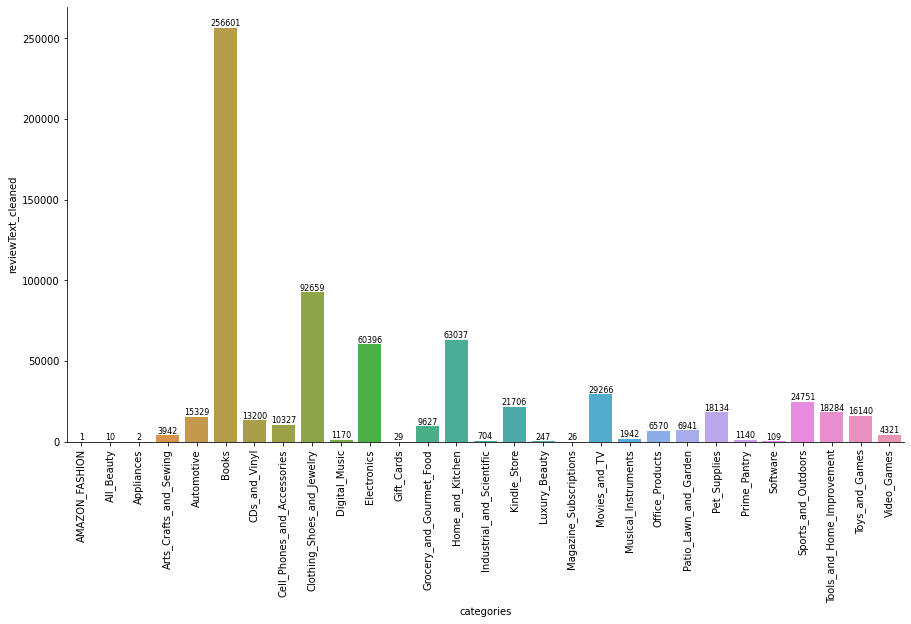

In [90]:
#plot data by categories
categories = df_pd.groupby('categories')['reviewText_cleaned'].count().to_frame().reset_index()

plt.figure(figsize = (15,8))

ax = sns.barplot(data=categories, x='categories', y='reviewText_cleaned')

for p in ax.patches:
  ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=8, ha='center', va='bottom')

sns.despine(top=True, right=True)
ax.tick_params(axis='x', rotation=90)

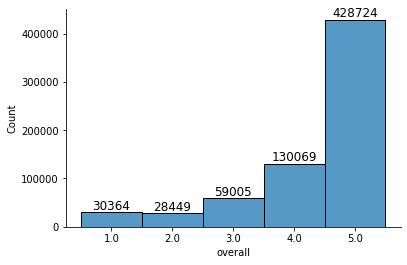

In [91]:
#plot distribution of overall score
overall = pd.Series(df_pd.overall.sort_values().astype(str), name="overall")
ax = sns.histplot(overall)

for p in ax.patches:
  ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, ha='center', va='bottom')
sns.despine(top=True, right=True)


In [92]:
#there are lot more reviews that are 5 stars compared to 1 stars

In [93]:
#plot distribution of overall score
df_pd.vote.describe()

count    112731.000000
mean          8.483682
std          23.656996
min           2.000000
25%           2.000000
50%           3.000000
75%           7.000000
max         999.000000
Name: vote, dtype: float64

In [94]:
#Most reviews don't get a lot of vote

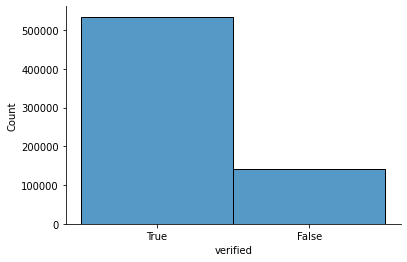

In [95]:
#plot distribution of verified reviews
verified = pd.Series(df_pd.verified.astype('str'), name="verified")
ax = sns.histplot(verified)

#for p in ax.patches:
#  ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
#            fontsize=12, ha='center', va='bottom')
sns.despine(top=True, right=True)

In [96]:
#most reviews are verified which means majority of the reviews come from actual people who bought the products.

In [113]:
#look at a redom review
print(df_pd.iloc[60000,:])
df_pd.iloc[60000,2]

categories                                          Musical_Instruments
overall                                                               4
reviewText_cleaned    ill start off by saying these cables are not l...
summary_cleaned                                   they get the job done
verified                                                           True
vote                                                                NaN
Name: 60000, dtype: object


'ill start off by saying these cables are not lookers they dont look bad by any means theyre just basic plastic cables i basically bought these to help me experiment with a new pedal board without disassembling my old one that being said they worked great with my pedals im using a wah 3 dirt pedals and a multi effects in the loop of my amp i cant notice any additional noise in my signal chain even with a direct side by side comparison with my monster cables\n\ni cant quite comment on how long they will last ive used them for a couple of months now with no issues ive been frequently rearranging my pedals and havent had one fail yet ive also left them in a hot car with no issues afterwards'

In [114]:
df_pd.iloc[60000,3]

'they get the job done'

In [120]:
#we are mostly interested in knowing whether a comment is positive or negative
#create datafram to hold only essential data
df = df_pd
df.head(5)

,categories,overall,reviewText_cleaned,summary_cleaned,verified,vote,text
0,Video_Games,3.0,b,b,True,NaN,b b
1,Video_Games,5.0,best expansion for wow to date in my opinion p...,must have for wow players,False,NaN,must have for wow players best expansion for w...
2,Video_Games,4.0,bought this for my son for his birthday and he...,good game,True,NaN,good game bought this for my son for his birth...
3,Video_Games,1.0,but this game lacks one major partweather this...,stunningly beatiful,False,NaN,stunningly beatiful but this game lacks one ma...
4,Video_Games,5.0,daughter addicted to game,five stars,True,NaN,five stars daughter addicted to game


In [121]:
df['text'] = df.summary_cleaned + ' ' + df.reviewText_cleaned
df.head(5)

,categories,overall,reviewText_cleaned,summary_cleaned,verified,vote,text
0,Video_Games,3.0,b,b,True,NaN,b b
1,Video_Games,5.0,best expansion for wow to date in my opinion p...,must have for wow players,False,NaN,must have for wow players best expansion for w...
2,Video_Games,4.0,bought this for my son for his birthday and he...,good game,True,NaN,good game bought this for my son for his birth...
3,Video_Games,1.0,but this game lacks one major partweather this...,stunningly beatiful,False,NaN,stunningly beatiful but this game lacks one ma...
4,Video_Games,5.0,daughter addicted to game,five stars,True,NaN,five stars daughter addicted to game


In [138]:
df['label'] = np.nan
for index, row in df.iterrows():
  if row['overall'] > 3:
    df.iloc[index,7] = 'positive'
  elif row['overall'] < 3:
    df.iloc[index,7]  = 'negative'
  else:
    df.iloc[index,7]  = np.nan
df

,categories,overall,reviewText_cleaned,summary_cleaned,verified,vote,text,label
0,Video_Games,3.0,b,b,True,NaN,b b,NaN
1,Video_Games,5.0,best expansion for wow to date in my opinion p...,must have for wow players,False,NaN,must have for wow players best expansion for w...,positive
2,Video_Games,4.0,bought this for my son for his birthday and he...,good game,True,NaN,good game bought this for my son for his birth...,positive
3,Video_Games,1.0,but this game lacks one major partweather this...,stunningly beatiful,False,NaN,stunningly beatiful but this game lacks one ma...,negative
4,Video_Games,5.0,daughter addicted to game,five stars,True,NaN,five stars daughter addicted to game,positive
...,...,...,...,...,...,...,...,...
676606,Books,5.0,very authentic recipes easy to understand,easy to,True,NaN,easy to very authentic recipes easy to understand,positive
676607,Books,5.0,very interesting to see the pacific war from t...,five stars,True,NaN,five stars very interesting to see the pacific...,positive
676608,Books,1.0,was not impressed,more of a headache than benefit,False,NaN,more of a headache than benefit was not impressed,negative
676609,Books,5.0,well put together,five stars,True,NaN,five stars well put together,positive


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676611 entries, 0 to 676610
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   categories          676611 non-null  object 
 1   overall             676611 non-null  float64
 2   reviewText_cleaned  676611 non-null  object 
 3   summary_cleaned     676611 non-null  object 
 4   verified            676611 non-null  bool   
 5   vote                112731 non-null  float64
 6   text                676611 non-null  object 
 7   label               617606 non-null  object 
dtypes: bool(1), float64(2), object(5)
memory usage: 36.8+ MB


In [153]:
df_drop_index = df[df['label'].isna()].index

In [154]:
df_drop_index

Int64Index([     0,     12,     22,     27,     37,     54,     65,     74,
                76,     88,
            ...
            676504, 676512, 676514, 676534, 676539, 676550, 676560, 676569,
            676574, 676600],
           dtype='int64', length=59005)

In [155]:
df_drop = df.drop(index = df_drop_index)

In [156]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617606 entries, 1 to 676610
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   categories          617606 non-null  object 
 1   overall             617606 non-null  float64
 2   reviewText_cleaned  617606 non-null  object 
 3   summary_cleaned     617606 non-null  object 
 4   verified            617606 non-null  bool   
 5   vote                100708 non-null  float64
 6   text                617606 non-null  object 
 7   label               617606 non-null  object 
dtypes: bool(1), float64(2), object(5)
memory usage: 38.3+ MB


In [157]:
df_drop = df_drop.drop(columns=['categories','overall','reviewText_cleaned',
                                'summary_cleaned','verified','vote'])

In [161]:
df_drop = df_drop.reset_index(drop=True)

In [162]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617606 entries, 0 to 617605
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   index   617606 non-null  int64 
 1   text    617606 non-null  object
 2   label   617606 non-null  object
dtypes: int64(1), object(2)
memory usage: 14.1+ MB


In [166]:
#save dataframe
df_drop.to_csv("drive/MyDrive/Colab_Notebooks/Amazon_reviews/data_ready.csv")